In [1]:
import glob
import math
import os

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
%matplotlib inline

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

/home/whiterab22bit/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist_dataframe = pd.read_csv('/home/whiterab22bit/train_mnist.csv', sep=',')

mnist_dataframe = mnist_dataframe.head(30000)

mnist_dataframe = mnist_dataframe.reindex(np.random.permutation(mnist_dataframe.index))
mnist_dataframe.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4756,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13269,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17096,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15502,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist_dataframe.label

4756     2
13269    8
17096    9
15502    4
1225     2
        ..
7382     5
5584     4
3152     0
14508    2
13580    0
Name: label, Length: 20000, dtype: int64

In [4]:
def parse_labels_and_features(dataset):
    labels = dataset.label
    
    features = dataset.iloc[:,1:785]
  
    eatures = features // 255
    
    return labels, features

In [5]:
training_targets, training_examples = parse_labels_and_features(mnist_dataframe[:7500])
training_examples.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,...,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.1,1.5,2.3,0.9,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,191.0,77.0,197.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
validation_targets, validation_examples = parse_labels_and_features(mnist_dataframe[7500:10000])
validation_examples.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,...,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.7,7.4,5.7,3.5,0.4,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.0,253.0,252.0,177.0,22.0,0.0,0.0,0.0,0.0,0.0


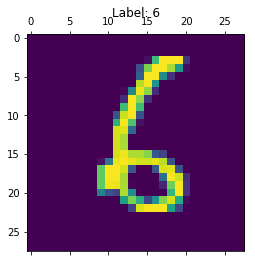

In [7]:
rand_example = np.random.choice(training_examples.index)
_, ax = plt.subplots()
ax.matshow(training_examples.loc[rand_example].values.reshape(28, 28))
ax.set_title("Label: %i" % training_targets.loc[rand_example])
ax.grid(False)

In [8]:
def construct_feature_columns():
    # There are 784 pixels in each image.
    return set([tf.feature_column.numeric_column('pixels', shape=784)])

In [9]:
def create_training_input_fn(features, labels, batch_size, num_epochs=None, shuffle=True):
    def _input_fn(num_epochs=None, shuffle=True):
        idx = np.random.permutation(features.index)
        raw_features = {"pixels":features.reindex(idx)}
        raw_targets = np.array(labels[idx])
   
        ds = Dataset.from_tensor_slices((raw_features,raw_targets)) # warning: 2GB limit
        ds = ds.batch(batch_size).repeat(num_epochs)
    
        if shuffle:
            ds = ds.shuffle(10000)
            
        feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
        return feature_batch, label_batch
    return _input_fn

In [10]:
def create_predict_input_fn(features, labels, batch_size):
    def _input_fn():
        raw_features = {"pixels": features.values}
        raw_targets = np.array(labels)
    
        ds = Dataset.from_tensor_slices((raw_features, raw_targets)) # warning: 2GB limit
        ds = ds.batch(batch_size)
    
        
        # Return the next batch of data.
        feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
        return feature_batch, label_batch
    return _input_fn

In [21]:
def train_dnn_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    periods = 10
    steps_per_period = steps / periods  
    
    feature_columns = [tf.feature_column.numeric_column('pixels', shape=784)]
    
    predict_training_input_fn = create_predict_input_fn(
        training_examples, training_targets, batch_size)
    predict_validation_input_fn = create_predict_input_fn(
        validation_examples, validation_targets, batch_size)
    training_input_fn = create_training_input_fn(
        training_examples, training_targets, batch_size)
    
    
    my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    classifier = tf.estimator.DNNClassifier(
        feature_columns=feature_columns,
        n_classes=10,
        hidden_units=hidden_units,
        optimizer=my_optimizer,
        config=tf.contrib.learn.RunConfig(keep_checkpoint_max=1),
        model_dir="/home/whiterab22bit/dnn_dir/")
    
    print("Training model...")
    print("LogLoss error (on validation data):")
    training_errors = []
    validation_errors = []
    for period in range (0, periods):
        classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period)
        
        training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
        training_probabilities = np.array([item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array([item['class_ids'][0] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,10)
        
        validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
        validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
        validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
        validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,10)    
    
   
        training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
        validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
    
        print("  period %02d : %0.2f" % (period, validation_log_loss))
    
        training_errors.append(training_log_loss)
        validation_errors.append(validation_log_loss)
    print("Model training finished.")
 
  
    final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
    final_predictions = np.array([item['class_ids'][0] for item in final_predictions])
  
  
    accuracy = metrics.accuracy_score(validation_targets, final_predictions)
    print("Final accuracy (on validation data): %0.2f" % accuracy)

  
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.plot(training_errors, label="training")
    plt.plot(validation_errors, label="validation")
    plt.legend()
    plt.show()
  
 
    cm = metrics.confusion_matrix(validation_targets, final_predictions)
  
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, cmap="bone_r")
    ax.set_aspect(1)
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    return classifier

Training model...
LogLoss error (on validation data):
  period 00 : 2.40
  period 01 : 2.33
  period 02 : 2.36
  period 03 : 2.51
  period 04 : 2.58
  period 05 : 2.17
  period 06 : 2.31
  period 07 : 2.14
  period 08 : 2.40
  period 09 : 2.65
Model training finished.
Final accuracy (on validation data): 0.92


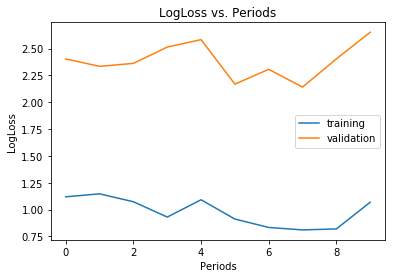

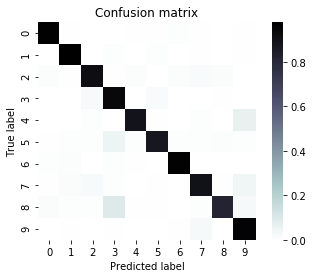

In [22]:
classifier = train_dnn_model(
    learning_rate=0.03,
    steps=1000,
    batch_size=30,
    hidden_units=[150, 100],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

test_mnist = pd.read_csv('/home/dariagurova91/test_mnist.csv', sep=',')
test_mnist.head()

In [ ]:
def test_predict_input_fn(features, batch_size):
    def _input_fn():
        raw_features = {"pixels": features.values}
    
        ds = Dataset.from_tensor_slices((raw_features))
        ds = ds.batch(batch_size)
    
        feature_batch = ds.make_one_shot_iterator().get_next()
        return feature_batch
    return _input_fn


predict_test_input_fn = test_predict_input_fn(
    test_mnist, 30)

In [ ]:
test_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
test_probabilities = np.array([item['probabilities'] for item in test_predictions])
test_pred_class_id = np.array([item['class_ids'][0] for item in test_predictions])

In [ ]:
test_probabilities = np.argmax(test_probabilities,axis = 1)

test_probabilities = pd.Series(test_probabilities,name="Label")

submiss = pd.concat([pd.Series(range(1,28001),name = "ImageId"),test_probabilities],axis = 1)

submiss.to_csv(path_or_buf="/home/dariagurova91/mnist_pred.csv",index=False)